In [8]:
#import necessary packages
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
from pandas_datareader import data

In [9]:
import glob
import pandas as pd

path =r'/home/poon/Documents/set-archive_EOD_UPDATE' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

frame.columns = ['Symbol', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume']

def getStock(name):
    stock = frame.loc[frame['Symbol'] == name]
    stock = stock.sort_values(by='Date')
    stock['Date'] = pd.to_datetime(stock['Date'], format='%Y%m%d')
    stock = stock.set_index(['Date'])
    return stock

In [11]:
stock = getStock('SET')

In [12]:
stock.head()

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
1975-04-30,SET,100.00,100.00,100.00,100.00,163310
1975-05-02,SET,99.96,99.96,99.96,99.96,150220
1975-05-06,SET,99.53,99.53,99.53,99.53,260100
1975-05-07,SET,99.13,99.13,99.13,99.13,35480
1975-05-08,SET,97.88,97.88,97.88,97.88,52500


In [13]:
stock = stock.drop('Symbol', 1)

In [14]:
stock.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-04-10,1580.96,1583.04,1576.99,1581.19,6508134730
2017-04-11,1582.51,1585.93,1579.96,1582.78,6306722590
2017-04-12,1584.97,1589.50,1584.40,1589.50,5863451320
2017-04-17,1585.78,1585.96,1574.80,1575.91,6429044940
2017-04-18,1579.62,1583.78,1574.42,1574.42,7340007020


In [16]:
stock.to_csv('/home/poon/Downloads/SET.csv')

In [5]:
stock['2009':'2014-12-16']['Close'].plot()

In [6]:
stock = stock['2009':'2014-12-16']

In [7]:
stock['2014-12-12':'2014-12-16']

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2014-12-12,SET,1523.53,1530.74,1513.39,1514.95,16031694610
2014-12-15,SET,1490.44,1494.10,1375.99,1478.49,50628760670
2014-12-16,SET,1440.20,1476.34,1422.63,1461.74,18986307620


In [8]:
 #calculate the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (stock.index[-1] - stock.index[0]).days
cagr = ((((stock['Close'][-1]) / stock['Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr
 
#create a series of percentage returns and calculate 
#the annual volatility of returns
stock['Returns'] = stock['Close'].pct_change()
vol = stock['Returns'].std()*np.sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

CAGR = 20.88%
Annual Volatility = 19.12%


In [9]:
stock['Close'][-1]

1461.74

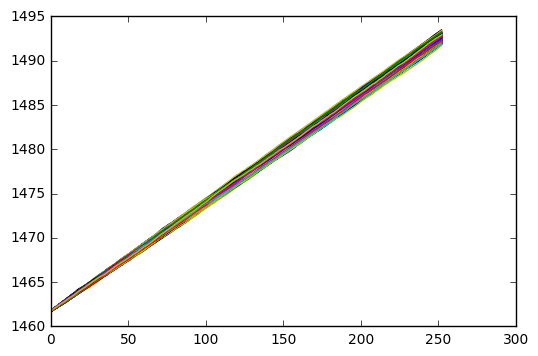

In [13]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
 
#Define Variables
S = stock['Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.02088 #Return
vol = 0.0001943 #Volatility
 
#choose number 1000 runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
 
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
 
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
 
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
 
#show the plot of multiple price series created above
plt.show()

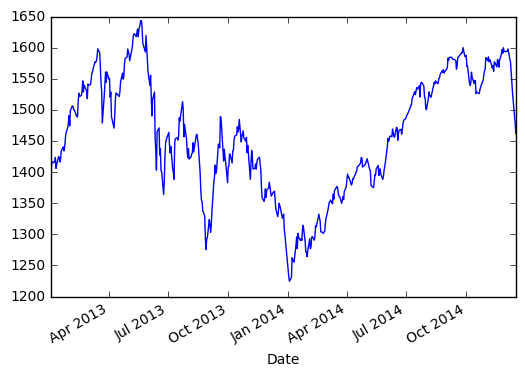

In [84]:
stock['2013':'2014-12-16']['Close'].plot()

In [85]:
stock = stock['2013':'2014-12-16']

In [86]:
 #calculate the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (stock.index[-1] - stock.index[0]).days
cagr = ((((stock['Close'][-1]) / stock['Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr
 
#create a series of percentage returns and calculate 
#the annual volatility of returns
stock['Returns'] = stock['Close'].pct_change()
vol = stock['Returns'].std()*np.sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

CAGR = 1.92%
Annual Volatility = 17.39%


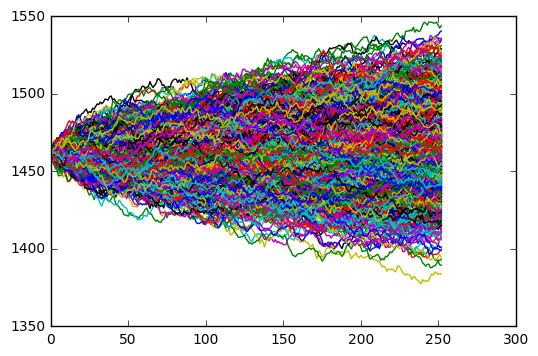

In [112]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
 
#Define Variables
S = stock['Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.00192 #Return
vol = 0.01739 #Volatility
 
#choose number 1000 runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
 
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
 
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
 
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
 
#show the plot of multiple price series created above
plt.show()

In [113]:
#download Apple price data into DataFrame
stock = data.DataReader('AOT.BK', 'yahoo',start='1/1/2000')
 
#calculate the compound annual growth rate (CAGR) which 
#will give us our mean return input (mu) 
days = (stock.index[-1] - stock.index[0]).days
cagr = ((((stock['Adj Close'][-1]) / stock['Adj Close'][1])) ** (365.0/days)) - 1
print ('CAGR =',str(round(cagr,4)*100)+"%")
mu = cagr
 
#create a series of percentage returns and calculate 
#the annual volatility of returns
stock['Returns'] = stock['Adj Close'].pct_change()
vol = stock['Returns'].std()*np.sqrt(252)
print ("Annual Volatility =",str(round(vol,4)*100)+"%")

CAGR = 32.14%
Annual Volatility = 36.61%


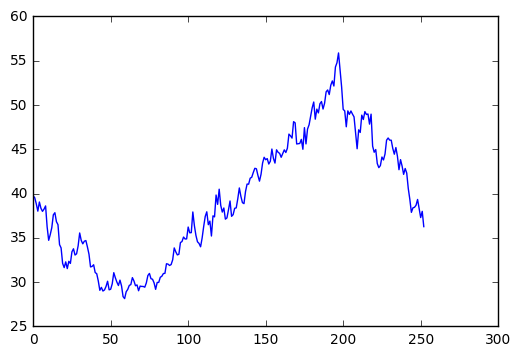

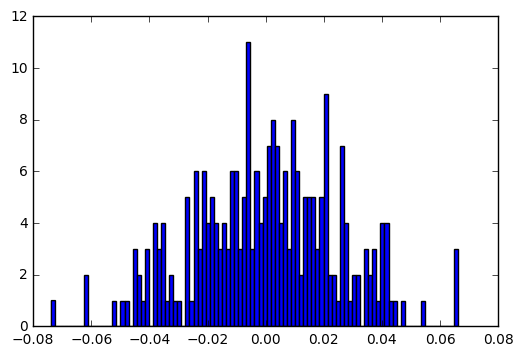

In [36]:
#Define Variables
S = stock['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.3217 #Return
vol = 0.3662 #Volatility
 
#create list of daily returns using random normal distribution
daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
 
#set starting price and create price series generated by above random daily returns
price_list = [S]
 
for x in daily_returns:
    price_list.append(price_list[-1]*x)
 
#Generate Plots - price series and histogram of daily returns
plt.plot(price_list)
plt.show()
plt.hist(daily_returns-1, 100) #Note that we run the line plot and histogram separately, not simultaneously.
plt.show()

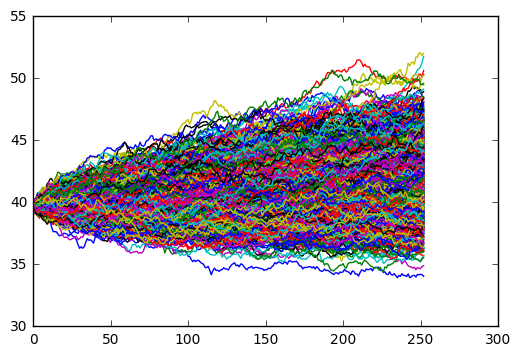

In [42]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
 
#Define Variables
S = stock['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.06217 #Return
vol = 0.06662 #Volatility
 
#choose number 1000 runs to simulate - I have chosen 1000
for i in range(1000):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
 
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
 
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
 
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
 
#show the plot of multiple price series created above
plt.show()

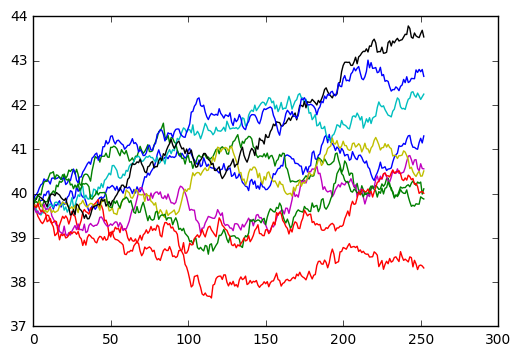

In [40]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
 
#Define Variables
S = stock['Adj Close'][-1] #starting stock price (i.e. last available real stock price)
T = 252 #Number of trading days
mu = 0.03217 #Return
vol = 0.03662 #Volatility
 
#choose number 1000 runs to simulate - I have chosen 1000
for i in range(10):
    #create list of daily returns using random normal distribution
    daily_returns=np.random.normal(mu/T,vol/math.sqrt(T),T)+1
 
    #set starting price and create price series generated by above random daily returns
    price_list = [S]
 
    for x in daily_returns:
        price_list.append(price_list[-1]*x)
 
    #plot data from each individual run which we will plot at the end
    plt.plot(price_list)
 
#show the plot of multiple price series created above
plt.show()

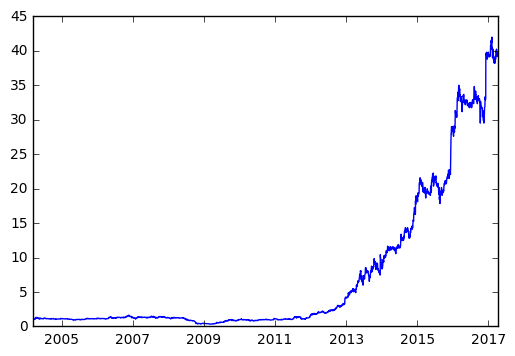

In [35]:
plt.plot(stock['Adj Close'])